### 이상치 데이터 처리
- 피처/특성에 데이터 값의 범위를 벗어나는 데이터를 의미  

- 종류 : 잘못 입력된 경우와 자연적으로 생성된 경우  
1) 잘못 입력된 데이터 : 입력 시 오타              => 제거 또는 대체
2) 자연 생성 데이터   : 연봉, 키, 몸무게, 나이    => 분리해서 전용 모델/식별용 피쳐로 전환

- 탐지  
1) 시각화 확인  
2) 데이터의 분포를 확인 : Z-score / IQR (Turkey Fences)

- 처리
1) 삭제 / 대체 / 분리 모델 / 파생 변수 추가

긱스 최고 - 굿  
Z-score는 표준 정규분포 분석에서 사용되는 지표입니다.   
표준 정규분포에서, 첨보값은 평균(μ)에서 deviation(표준편차)만큼 떨어져 있습니다.   
따라서 Z-score는 해당 값을 평균 1σ 범위 내에 벗어나는 것으로 표시합니다.

분리하기
예) 연봉이 2000, 3000, ... 중에 100,000 이 있을 때
    해당 특수한 경우만 0, 1 로 구분하는 피처 생성

In [21]:
# 0. 준비하기
import pandas as pd
import matplotlib.pyplot as plt

dataDF = pd.DataFrame({'num':[1,4,3,2,4,5,-14,2,1,15,2]})
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   num     11 non-null     int64
dtypes: int64(1)
memory usage: 216.0 bytes


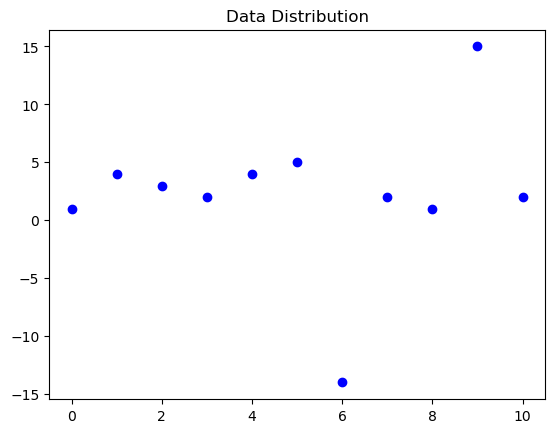

In [22]:
# 1. 데이터 전처리
# 1-1. 데이터 확인
plt.plot(dataDF, 'bo')
plt.title('Data Distribution')
plt.show()      # 15, -14 두 값이 크게 벗어난다.

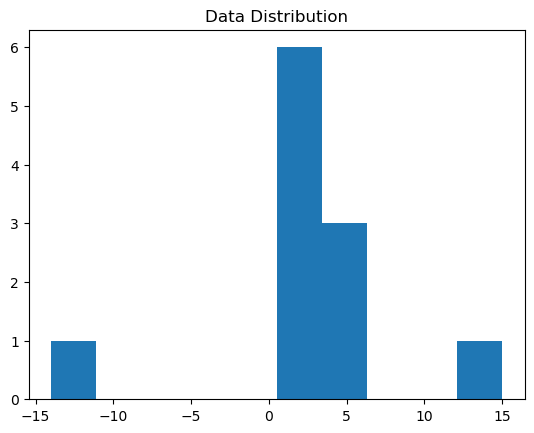

In [23]:
# 히스토그램으로 확인하기
plt.hist(dataDF['num'], bins=10)
plt.title('Data Distribution')
plt.show()      # 양 끝단은 버릴 것

In [24]:
# 2-2. 불필요 데이터 체크 => 결측치, 이상치
# 결측치
dataDF.isnull().sum()

num    0
dtype: int64

In [25]:
# 이상치 탐지 : 방법 1 - 평균과 편차를 이용한 탐지 : Z-score
# Z-score = (데이터 - 평균)/표준편차
mean_val = dataDF['num'].mean()
std_val = dataDF['num'].std()

z_data = ((dataDF - mean_val) / std_val)

In [33]:
# 양끝단 제거를 위한 기준값 => 1.0
base = 1.0
mask = z_data.abs() > base
dataDF[~mask]

,num
0,1.0
1,4.0
2,3.0
3,2.0
4,4.0
5,5.0
6,NaN
7,2.0
8,1.0
9,NaN


In [41]:
dataDF[~mask].dropna()  # 2 행 삭제
# inplace 가 안 먹힘 - 그치 ㄴㄷ

,num
0,1.0
1,4.0
2,3.0
3,2.0
4,4.0
5,5.0
7,2.0
8,1.0
10,2.0


In [53]:
# 이상치 탐지 - 방법 2 : 데이터를 4등분해서 가운데 데이터를 기준으로 이상치 탐지
threshold = 1.5
Q1 = dataDF.quantile(0.25)
Q3 = dataDF.quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

Q1, Q3, IQR, lower_bound, upper_bound

(num    1.5
 Name: 0.25, dtype: float64,
 num    4.0
 Name: 0.75, dtype: float64,
 num    2.5
 dtype: float64,
 num   -2.25
 dtype: float64,
 num    7.75
 dtype: float64)

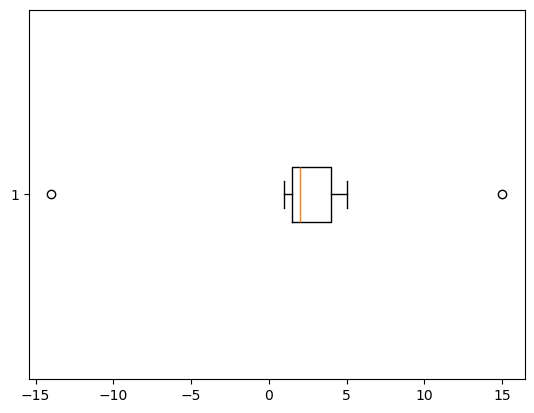

In [45]:
bp_obj = plt.boxplot(dataDF['num'], vert=False)
plt.show()

In [50]:
# boxplot의 반환값은 리스트로 나옴
bp_obj.keys()   # ['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means']
bp_obj['whiskers']  # 얘가 1.5*IQR 범위

boxes: the main body of the boxplot showing the quartiles and the median's confidence intervals if enabled.
medians: horizontal lines at the median of each box.
whiskers: the vertical lines extending to the most extreme, non-outlier data points.
caps: the horizontal lines at the ends of the whiskers.
fliers: points representing data that extend beyond the whiskers (fliers).
means: points or lines representing the means.

In [58]:
bp_obj['whiskers'][0].get_ydata(), bp_obj['whiskers'][1].get_ydata()   # 하위 25%, 상위 25%

(array([1, 1]), array([1, 1]))

In [56]:
bp_obj['boxes'][0].get_ydata(), bp_obj['boxes'][1].get_ydata()

array([0.925, 1.075, 1.075, 0.925, 0.925])

In [ ]:
# 함수를 만들어두기
## boxes는 뭐줌?

히히 ㅈ ㅔ 욕리스트에 머 적으려고 햇서요?ㅠ
그zz냥 욕 한 걸 모아둘랬는디 
뭘 확인해요 내가 복붙한건데 ㅋㅋㅋㅋㅋㅋㅋㅋ
긱스가 한줄 아나 네 - 내가 전진우 전용 긱스  ㅇㅈ 
세상 당황
저걸 어떻게 맞췄지?>?> 했음  개웃기네
에휴 진짜 교수 진짜 민폐 개쩐다 그러고 돈받아간게 레전드 마지막 날까지 쳐잔것도 ㄱ레전드네
쉬는시간 달라ㅜ  ㅋㅋㅋㅋㅋㅋㅋ 목소리 죽을라하노
왜 보세용 ㄷ 승민씨 오점뭐 죽이나 드세요  헐 .... 오좀 봐요 ㅋㅋㅋㅋㅋㅋㅋ��점 링거
 